In [1]:
'''
A demo on interacting with data using the pandas and seaborn libraries.

This demo is very rough! 
'''

from ast import increment_lineno
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
from tabulate import tabulate


%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\Jim\Desktop\Code\Tab_Pyth_SQL_portfolio_projects\Movies\movies.csv')
#with open("head.txt", "w") as text_file:
#    print(tabulate(df.head()), file=text_file)


In [2]:
#df.head()

In [3]:
# Checking for NULL values
for col in df.columns:
    percent_missing = np.mean( df[col].isnull() )
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Dropping rows with NULL values
df = df.dropna(how='any',axis=0) 

# Aesthetic alterations to certain measures
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')

# Not every movie has matching 'year' and year in 'released' values, so we take the year in 'released'
# See row 101 Mad Max 2: 
# 'year' = 1981
# 'released' = 'May 21, 1982 (United States)' 
df['year_corrected'] = df['released'].str.findall('(\d+)').str[1]
df['year_corrected'] = df['year_corrected'].astype('int64')


In [6]:
df.head(60)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [7]:
np.mean(df['year'] == df['year_corrected'])

0.8701683003513964

In [8]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [9]:
pd.set_option('display.max_rows', None)
#df

In [10]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

<function matplotlib.pyplot.show(close=None, block=None)>

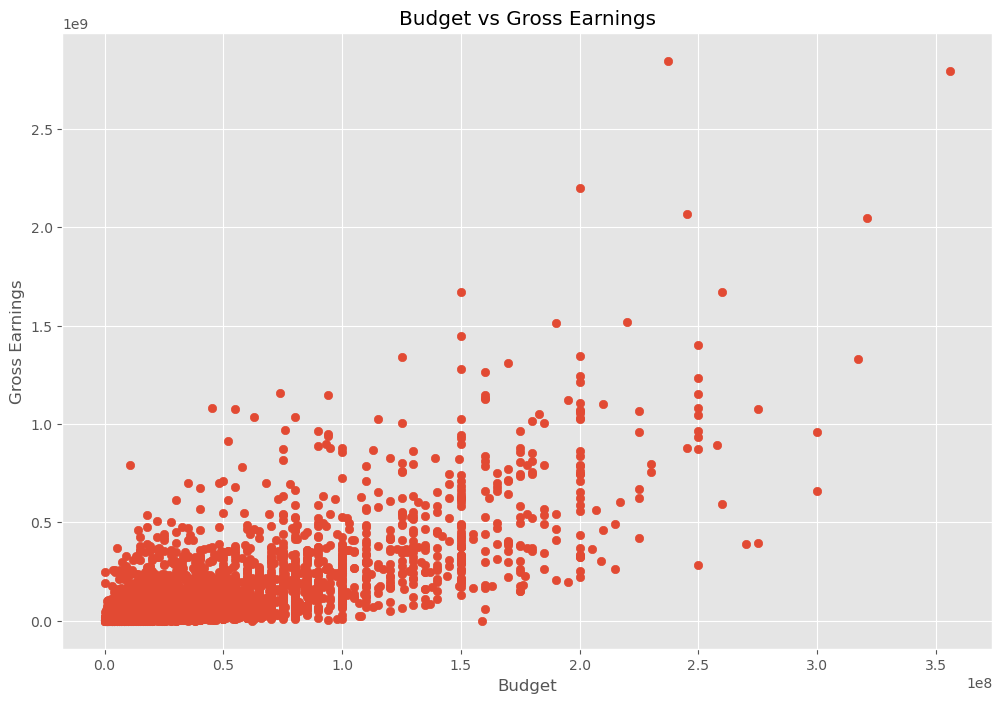

In [11]:
# The next few cells demo plots and a SLR via seaborn

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

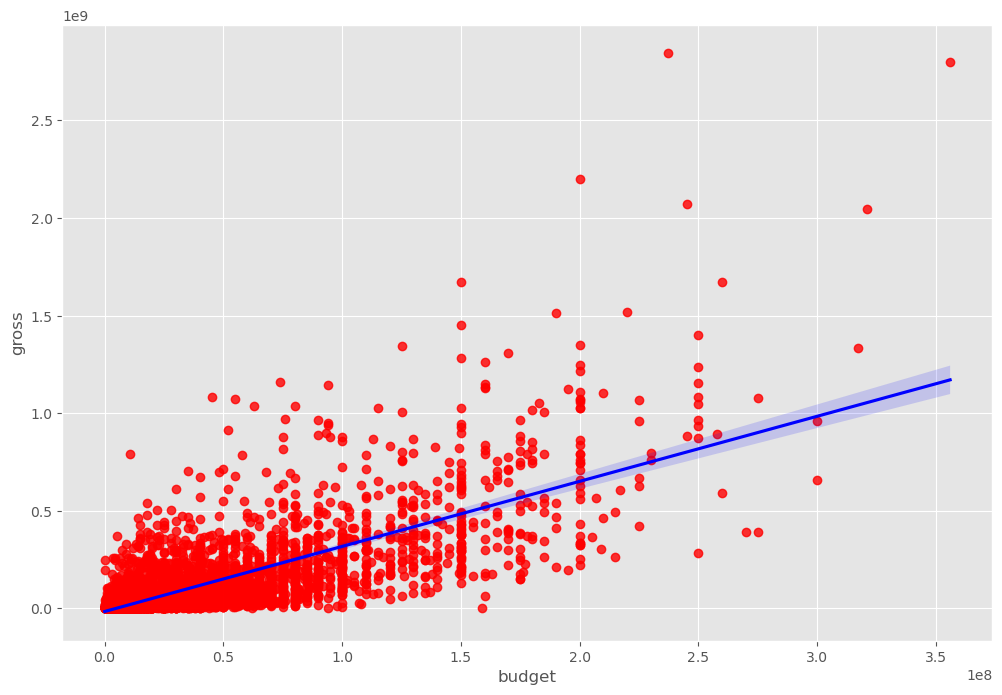

In [12]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [13]:
corr_matrix = df.corr()
corr_matrix

,year,score,votes,budget,gross,runtime,year_corrected
year,1.000000,0.055681,0.204904,0.326740,0.273512,0.074849,0.998962
score,0.055681,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.204904,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.326740,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.273512,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.074849,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
year_corrected,0.998962,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


<AxesSubplot:>

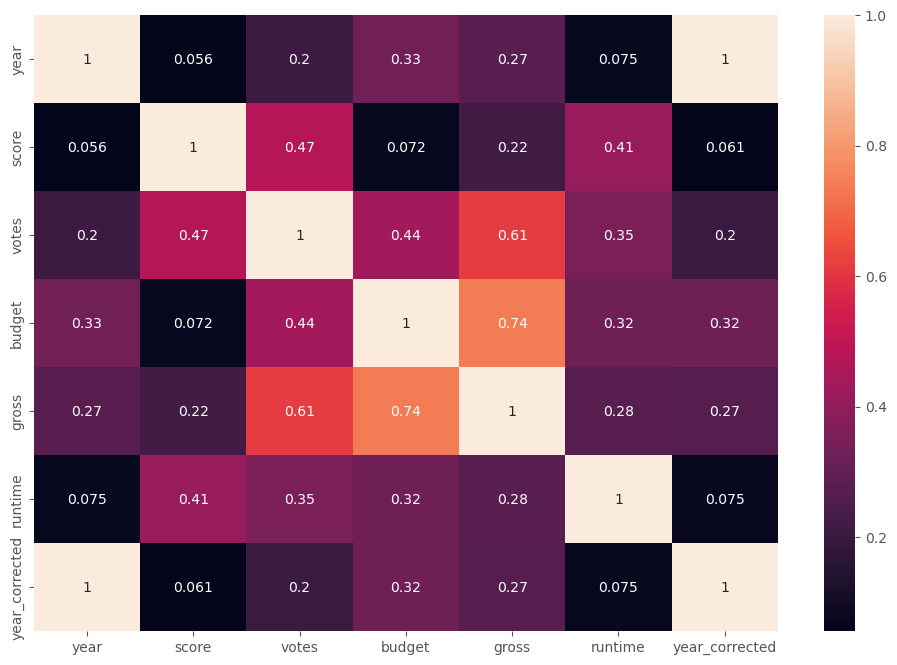

In [14]:
sns.heatmap(corr_matrix, annot=True)

In [15]:
# We wish to correlate 'company' with 'gross'. 
# To do this, we will assign a numeric value to each distinct company value.

df_numeric = df
for col in df_numeric:
    if df_numeric[col].dtype == 'object':
        df_numeric[col] = df_numeric[col].astype('category')
        df_numeric[col] = df_numeric[col].cat.codes

#df_numeric

<AxesSubplot:>

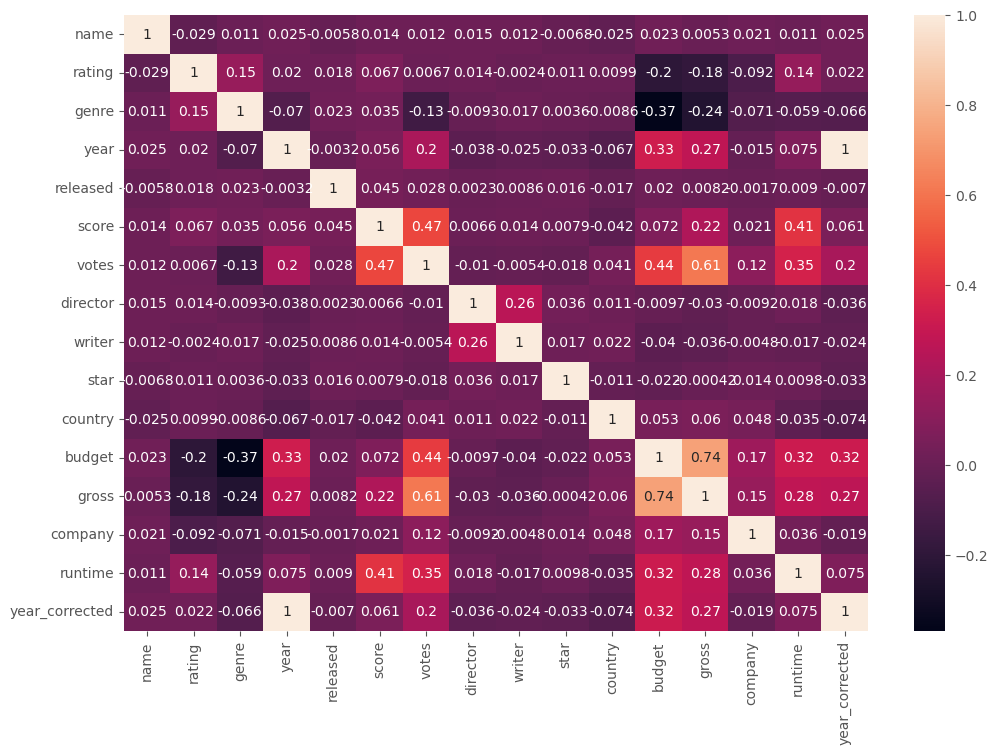

In [16]:
corr_matrix_numeric = df_numeric.corr()
sns.heatmap(corr_matrix_numeric, annot=True)

In [17]:
# Values for 'company' could be standardized. For example, 
# Walt Disney Productions, Walt Disney Pictures, Walt Disney Animation Studios...

In [18]:
corr_pairs = corr_matrix_numeric.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget          genre            -0.368226
genre           budget           -0.368226
                gross            -0.243547
gross           genre            -0.243547
rating          budget           -0.203553
budget          rating           -0.203553
rating          gross            -0.181739
gross           rating           -0.181739
votes           genre            -0.134986
genre           votes            -0.134986
company         rating           -0.092134
rating          company          -0.092134
country         year_corrected   -0.074050
year_corrected  country          -0.074050
company         genre            -0.071046
genre           company          -0.071046
year            genre            -0.070039
genre           year             -0.070039
year            country          -0.067134
country         year             -0.067134
genre           year_corrected   -0.066049
year_corrected  genre            -0.066049
genre           runtime          -0.059148
runtime    

In [19]:
sorted_pairs[(sorted_pairs) > 0.5]

gross           votes             0.614432
votes           gross             0.614432
gross           budget            0.740028
budget          gross             0.740028
year            year_corrected    0.998962
year_corrected  year              0.998962
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64